# Projeto: Séries temporais - MBA

Observações:

1. Para cada questão, crie novas células para efetuar seus códigos. 

2. Nomear variáveis de acordo com o contexto da questão. 

3. Caso necessário, utilize novas caixas de textos para deixar comentários. 

Prof. Jorge Luiz 

jorgearaujo@unifor.br

1. Carregue o arquivo "DENGUE_MBA_ST.csv". Faça o que se pede:

a. Quantos casos de dengue há em cada ano para a cidade de Fortaleza? 

b. Crie gráficos temporal apresentando algumas médias móveis para o número de casos de Dengue em Fortaleza.

c. O dado é estacionário?

d. O dado apresenta uma distribuição normal?

e. Escolha um periodo para treinar o algum modelo de ML e faça a predição de algumas semanas posteriores. Crie um gráfico demonstrando o predição. Qual é a melhor forma de dividir o dado? 

f. Para 2011, as séries temporais de casos de dengue entre bairros são semelhantes? Calcule a correlação entre os pares de bairros e verifique o valor médio. 




# Dica de Solução 

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

## Questão 1

In [17]:
df_original=pd.read_csv('DENGUE_MBA_ST.csv')

In [18]:
df_original

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2020,49,0,0,0,0,1,0,2,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,2020-12-06
519,2020,50,0,0,0,0,1,0,1,0,...,0,0,0,0,2,0.0,0.0,0.0,0.0,2020-12-13
520,2020,51,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0.0,0.0,0.0,0.0,2020-12-20
521,2020,52,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,2020-12-27


In [19]:
#transformando datetime
df_original['DATA']=pd.to_datetime(df_original['DATA'])

In [20]:
df_original.columns

Index(['ANO', 'SEMANA_DO_ANO', 'AEROLANDIA', 'AEROPORTO', 'ALDEOTA',
       'ALTO DA BALANCA', 'ALVARO WEYNE', 'AMADEU FURTADO', 'ANCURI',
       'ANTONIO BEZERRA',
       ...
       'VICENTE PINZON', 'VILA ELLERY', 'VILA PERY', 'VILA UNIAO',
       'VILA VELHA', 'ALAGADICO', 'GENTILANDIA', 'MATA GALINHA',
       'PAN-AMERICANO', 'DATA'],
      dtype='object', length=122)

In [21]:
# Escolhenado apenas os bairros
df_original.drop(['ANO','SEMANA_DO_ANO','DATA'],axis=1)

,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,ARRAIAL MOURA BRASIL,AUTRAN NUNES,...,VARJOTA,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO
0,0,0,1,0,0,0,3,0,0,0,...,0,1,0,1,0,2,0.0,0.0,0.0,0.0
1,0,0,0,0,1,0,1,0,1,0,...,0,1,1,5,1,4,0.0,0.0,0.0,0.0
2,0,0,2,1,1,0,7,1,4,0,...,1,6,0,6,4,2,0.0,0.0,0.0,0.0
3,0,0,0,0,2,0,2,0,1,1,...,0,6,2,8,1,0,0.0,0.0,0.0,0.0
4,0,0,0,1,4,0,2,0,2,0,...,1,6,2,2,5,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,0,0,1,0,2,0,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
519,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,2,0.0,0.0,0.0,0.0
520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0.0,0.0,0.0,0.0
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0.0,0.0,0.0


In [22]:
# capturando todos os nomes dos bairros
bairroname=df_original.drop(['ANO','SEMANA_DO_ANO','DATA'],axis=1).columns
bairroname

Index(['AEROLANDIA', 'AEROPORTO', 'ALDEOTA', 'ALTO DA BALANCA', 'ALVARO WEYNE',
       'AMADEU FURTADO', 'ANCURI', 'ANTONIO BEZERRA', 'ARRAIAL MOURA BRASIL',
       'AUTRAN NUNES',
       ...
       'VARJOTA', 'VICENTE PINZON', 'VILA ELLERY', 'VILA PERY', 'VILA UNIAO',
       'VILA VELHA', 'ALAGADICO', 'GENTILANDIA', 'MATA GALINHA',
       'PAN-AMERICANO'],
      dtype='object', length=119)

In [23]:
df_original

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2020,49,0,0,0,0,1,0,2,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,2020-12-06
519,2020,50,0,0,0,0,1,0,1,0,...,0,0,0,0,2,0.0,0.0,0.0,0.0,2020-12-13
520,2020,51,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0.0,0.0,0.0,0.0,2020-12-20
521,2020,52,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,2020-12-27


In [24]:
# Dado de Fortaleza
Fortaleza=pd.Series(df_original[bairroname].sum(axis=1).values,index=df_original['DATA'].values)

In [25]:
Fortaleza

2011-01-09    200.0
2011-01-16    296.0
2011-01-23    288.0
2011-01-30    297.0
2011-02-06    341.0
              ...  
2020-12-06     29.0
2020-12-13     26.0
2020-12-20     36.0
2020-12-27     21.0
2020-12-31     17.0
Length: 523, dtype: float64

### a. Quantos casos de dengue há em cada ano para a cidade de Fortaleza? 

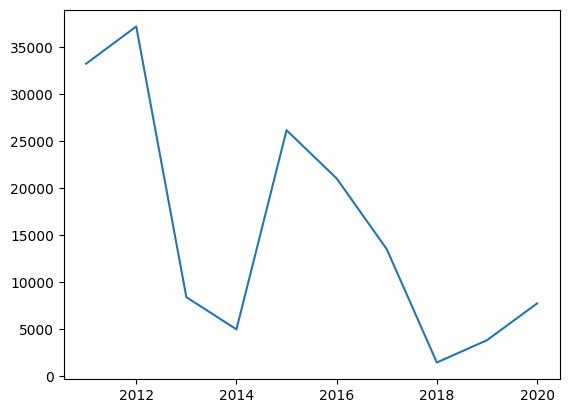

In [26]:
casosPorAno = Fortaleza.groupby(Fortaleza.index.year).sum()

plt.plot(casosPorAno)
plt.show()

### b. Crie gráficos temporal apresentando algumas médias móveis para o número de casos de Dengue em Fortaleza.

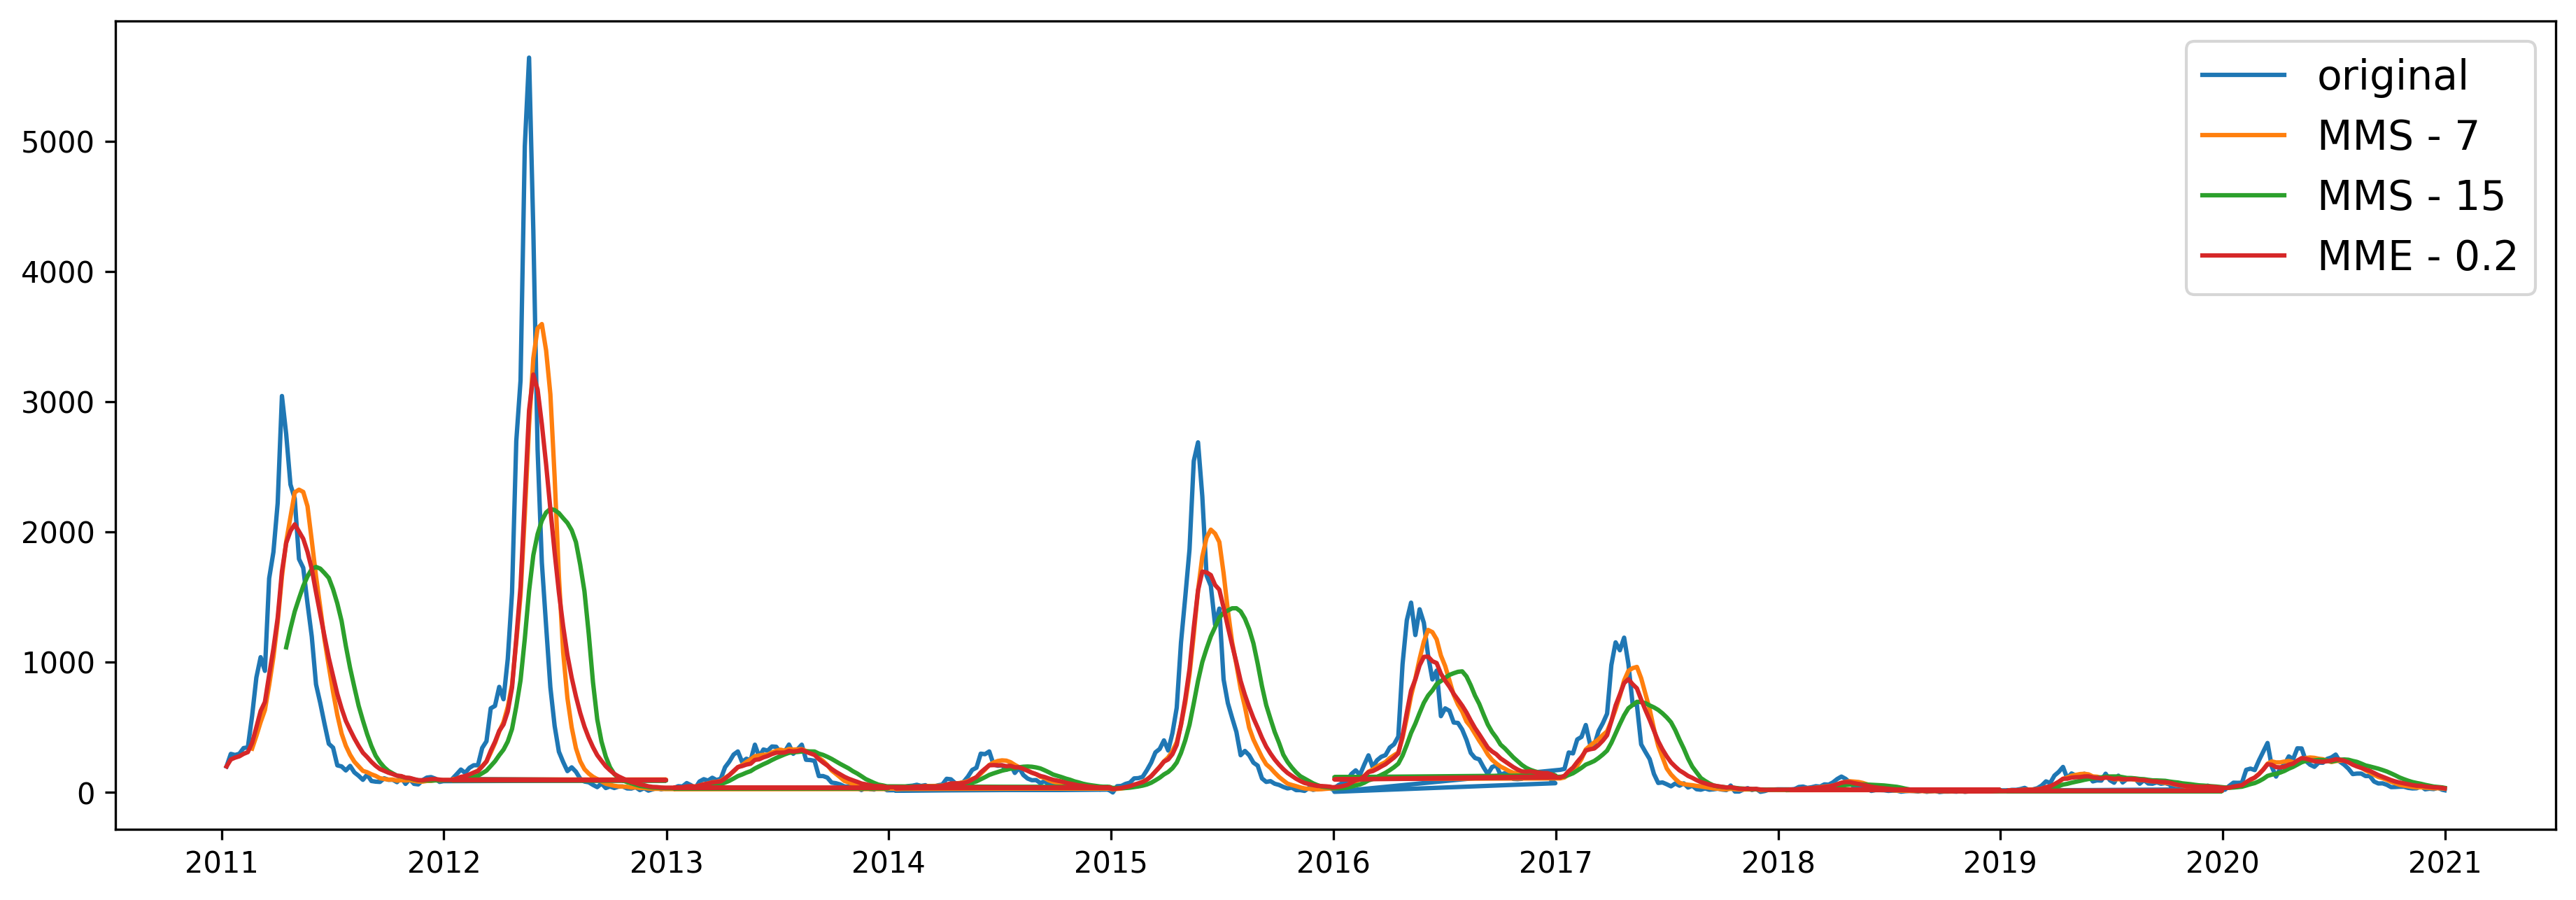

In [27]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(Fortaleza,label='original')
plt.plot(Fortaleza.rolling(7).mean(),label='MMS - 7')
plt.plot(Fortaleza.rolling(15).mean(),label='MMS - 15')
plt.plot(Fortaleza.ewm(alpha=0.2).mean(),label='MME - 0.2')
plt.legend(fontsize=14)

### c. O dado é estacionário?

In [28]:
from statsmodels.tsa.stattools import kpss

def is_stationary(xx):
    kpssx=kpss(xx)
    valorcritico=kpssx[3]['5%']
    teste=kpssx[0]
    if teste > valorcritico:
        texto='A série NÃO é estacionária'
    else:
        texto="A série É estacionária"
        
    return texto

In [29]:
is_stationary(Fortaleza)

'A série NÃO é estacionária'

### d. O dado apresenta uma distribuição normal?

In [30]:
import scipy.stats as stats

def is_normal(x):
    e,p=stats.shapiro(x)
    texto="A série NÃO é normal"
    if p>0.05:
        texto="A série É é normal"
    return texto

In [31]:
is_normal(Fortaleza)

'A série NÃO é normal'

### e. Escolha um periodo para treinar o algum modelo de ML e faça a predição de algumas semanas posteriores. Crie um gráfico demonstrando o predição. Qual é a melhor forma de dividir o dado?

#### Dividindo o dado

In [32]:
df=pd.DataFrame(Fortaleza)
df['SEMANA_DO_ANO']=df.index.isocalendar().week
df['ANO']=df.index.year
df['MES']=df.index.month
df['CASOS']=df[0]
df.drop(0,axis=1,inplace=True)

df.head()

,SEMANA_DO_ANO,ANO,MES,CASOS
2011-01-09,1,2011,1,200.0
2011-01-16,2,2011,1,296.0
2011-01-23,3,2011,1,288.0
2011-01-30,4,2011,1,297.0
2011-02-06,5,2011,2,341.0


### Treinando Modelo

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# separe o df em X e y

X=df.drop('CASOS',axis=1)
y=df['CASOS']

# separando os dados de treino e teste menos de 2020 para treino e 2020 para teste
X_train = X.loc[X.index.year<2020]
X_test = X.loc[X.index.year==2020]
y_train = y.loc[y.index.year<2020]
y_test = y.loc[y.index.year==2020]

modelo=XGBRegressor(n_estimators=1000,learning_rate=0.01)
modelo.fit(X_train,y_train)
print('Treino:',mean_squared_error(y_train,modelo.predict(X_train)))


Treino: 718.369906306951


### Fazendo predições dos valores já conhecidos para verificação

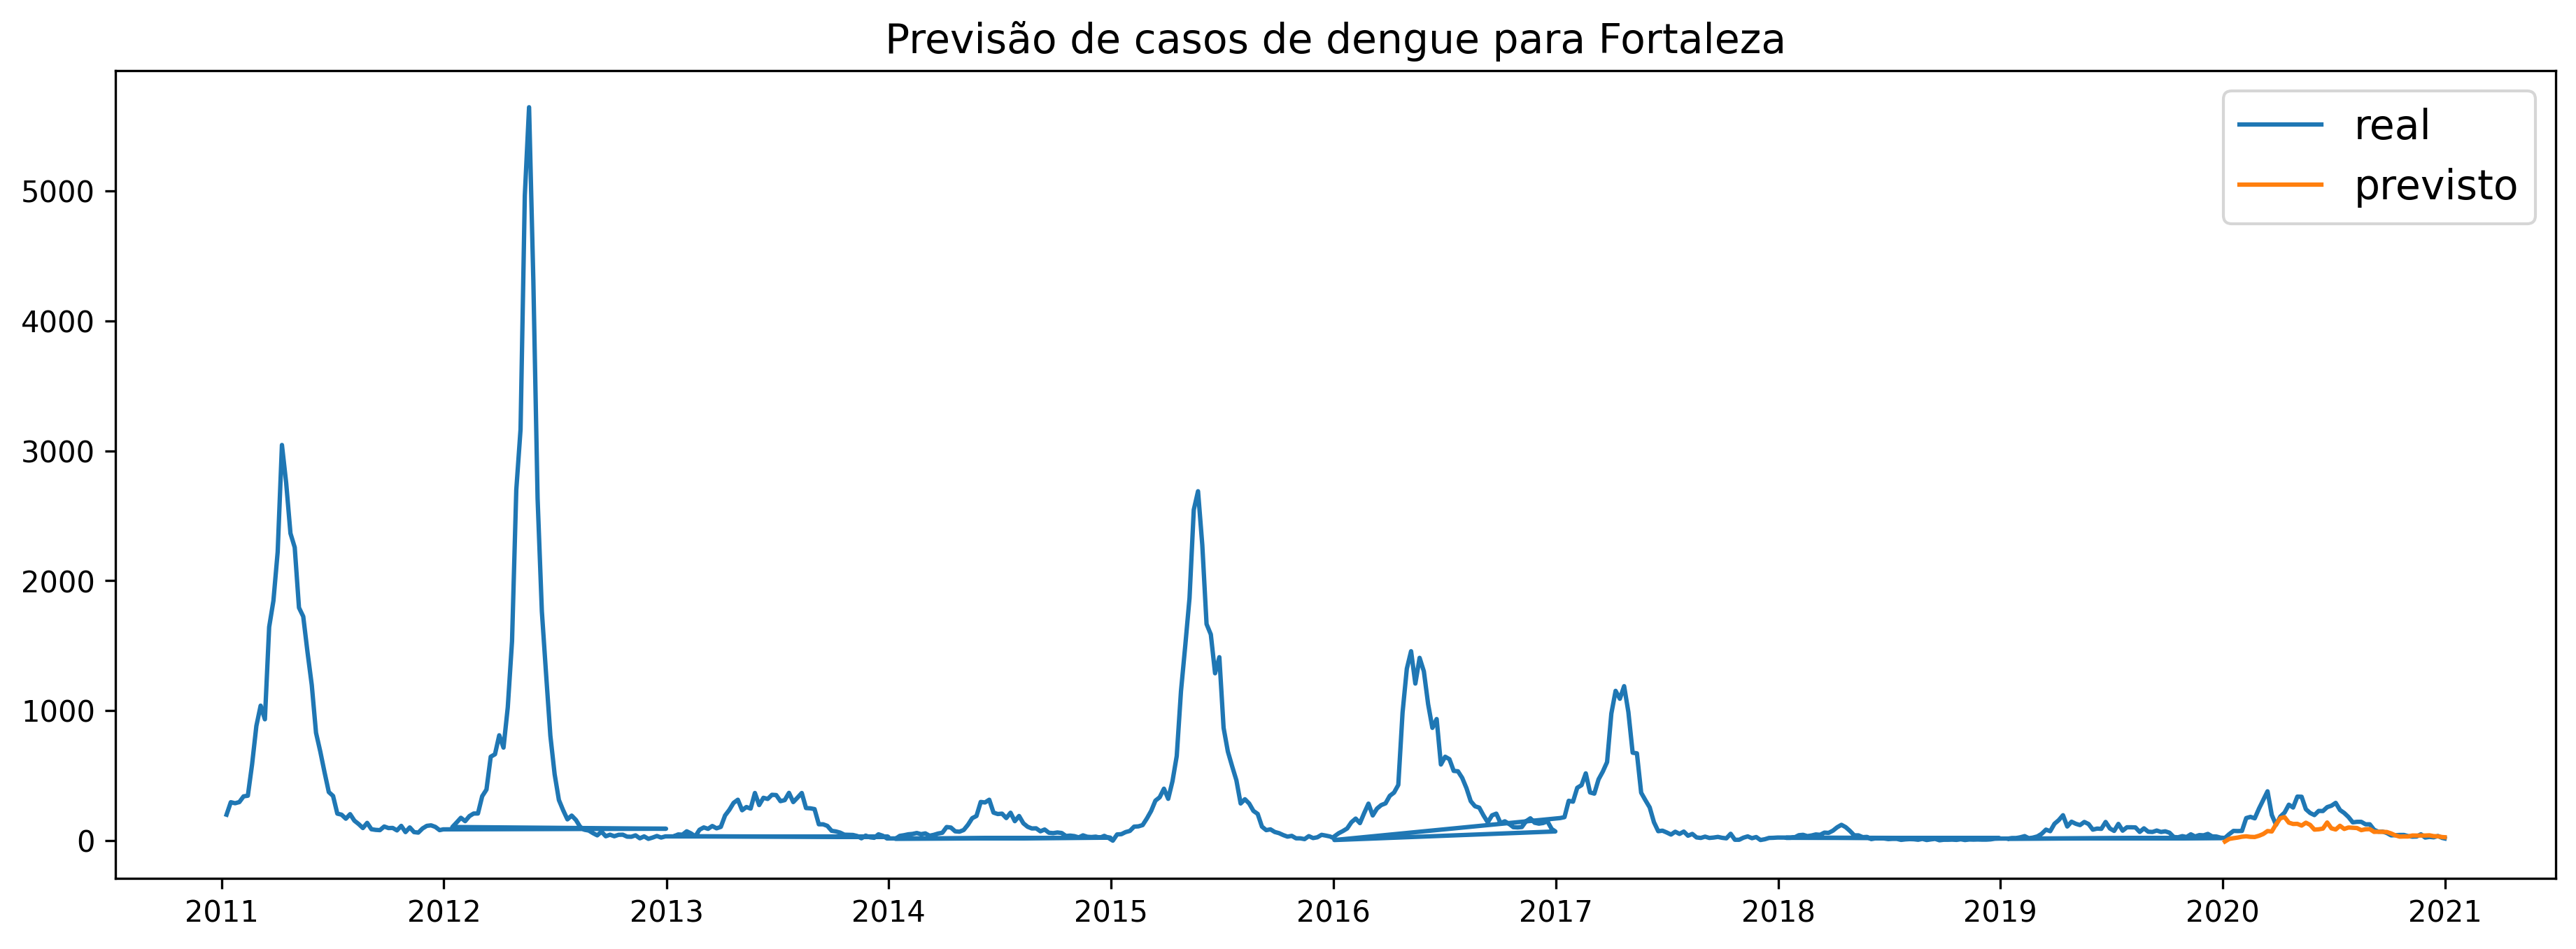

In [34]:
y_pred=modelo.predict(X_test)
y_pred=pd.Series(y_pred,index=y_test.index)

plt.figure(figsize=(15,5),dpi=300)
plt.title('Previsão de casos de dengue para Fortaleza',fontsize=14)
plt.plot(df['CASOS'],label='real')
plt.plot(y_pred,label='previsto')

plt.legend(fontsize=14)

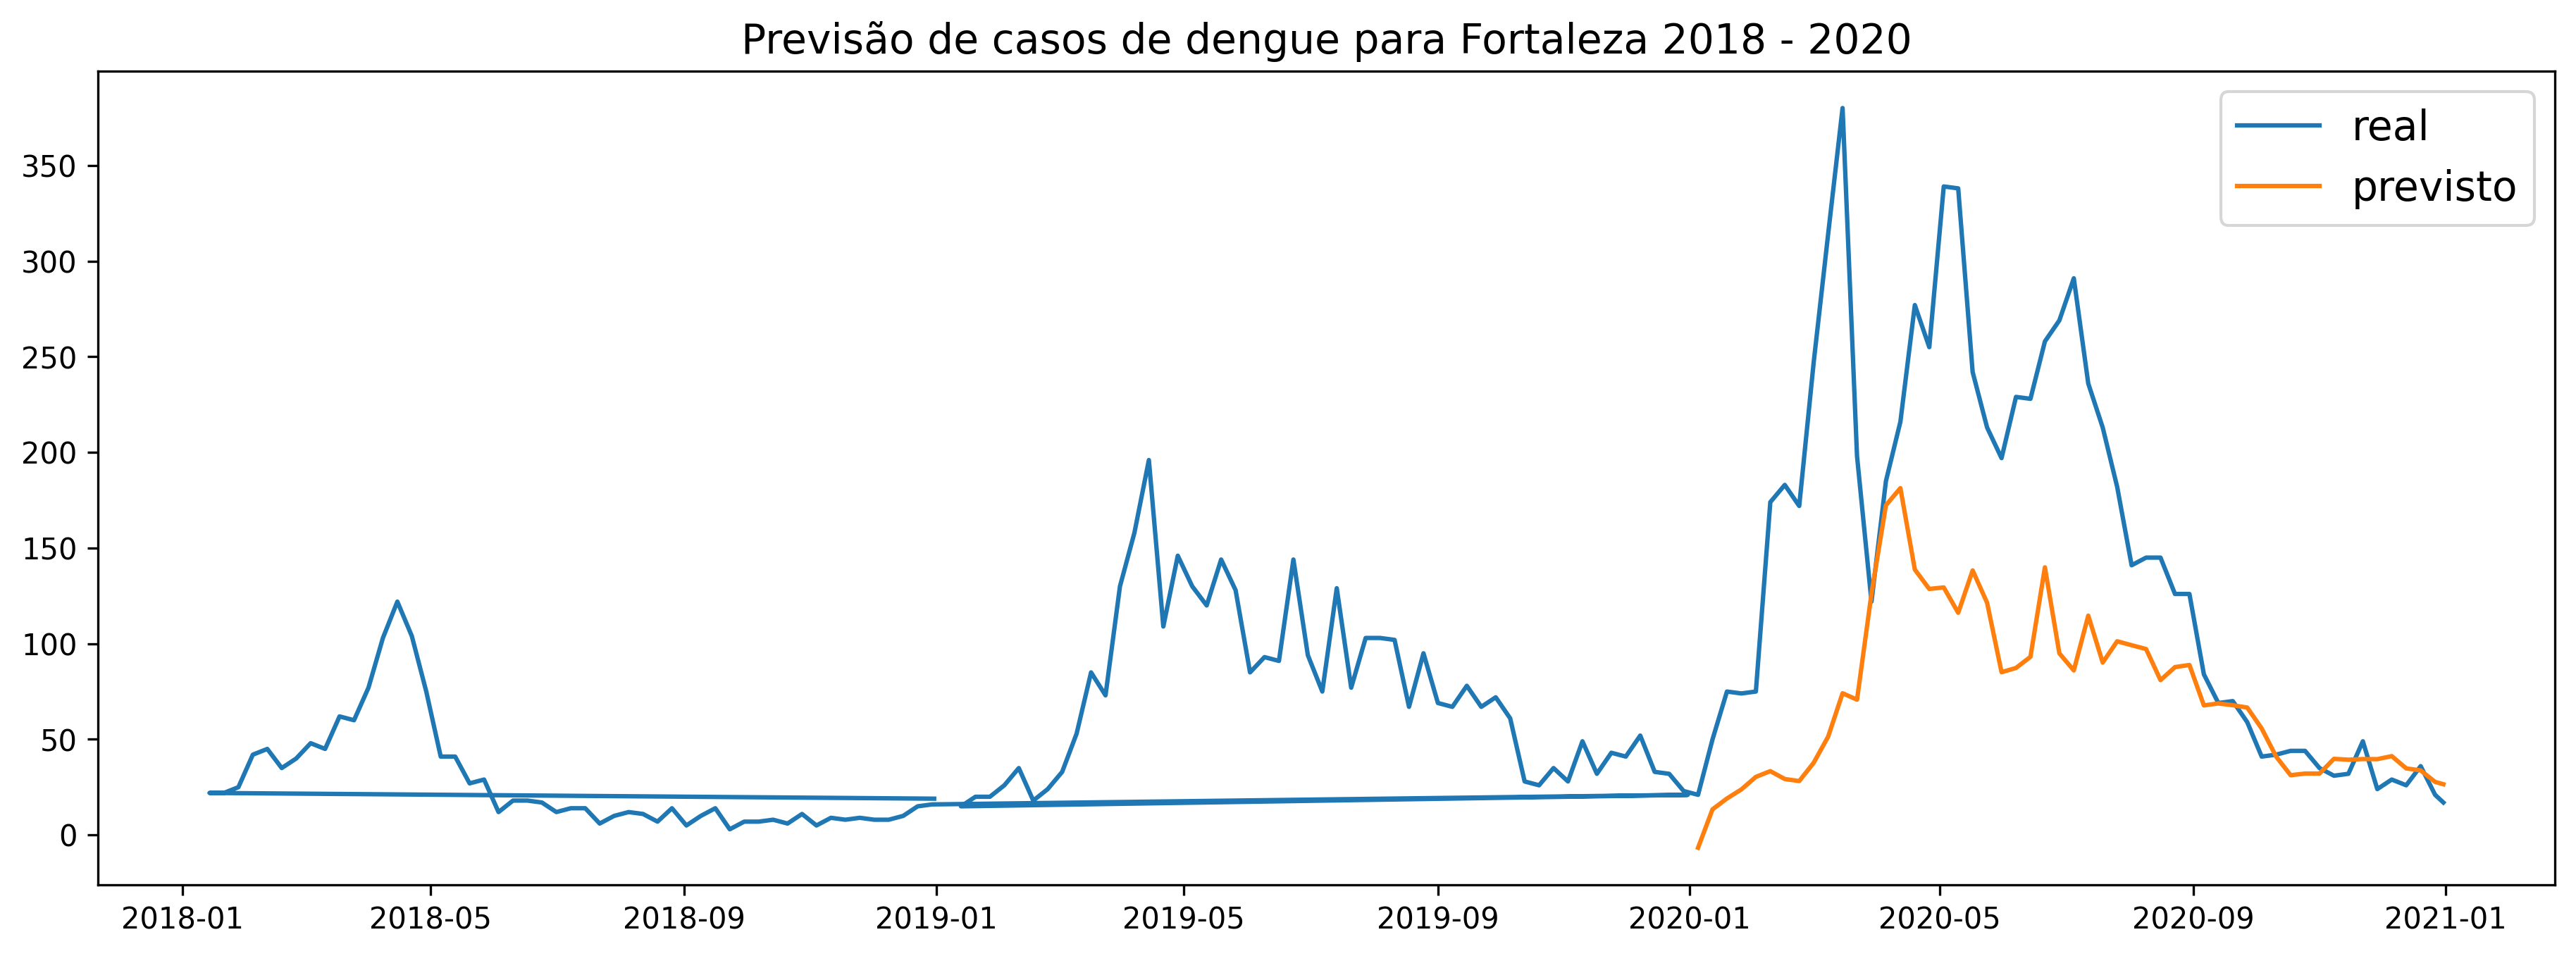

In [35]:
subset=df.loc[(df.index.year>=2018)]

plt.figure(figsize=(15,5),dpi=300)
plt.title('Previsão de casos de dengue para Fortaleza 2018 - 2020',fontsize=14)
plt.plot(subset['CASOS'],label='real')
plt.plot(y_pred,label='previsto')

plt.legend(fontsize=14)

### Fazendo previssão para 2021

In [36]:
X_train = X
y_train = y

modelo=XGBRegressor(n_estimators=1000,learning_rate=0.01)
modelo.fit(X_train,y_train)
print('Treino:',mean_squared_error(y_train,modelo.predict(X_train)))

Treino: 694.755970263626


### Criando dataset com datas semanais do ano de 2021 para fazer as previsões

In [37]:
datas=pd.date_range(start='2021-01-01',end='2021-12-31',freq='W')
df2021=pd.DataFrame(datas,columns=['DATA'])
df2021['SEMANA_DO_ANO']=df2021['DATA'].dt.isocalendar().week
df2021['ANO']=df2021['DATA'].dt.year
df2021['MES']=df2021['DATA'].dt.month
df2021.set_index('DATA',inplace=True)

df2021.head()

,SEMANA_DO_ANO,ANO,MES
DATA,,,
2021-01-03,53,2021,1
2021-01-10,1,2021,1
2021-01-17,2,2021,1
2021-01-24,3,2021,1
2021-01-31,4,2021,1


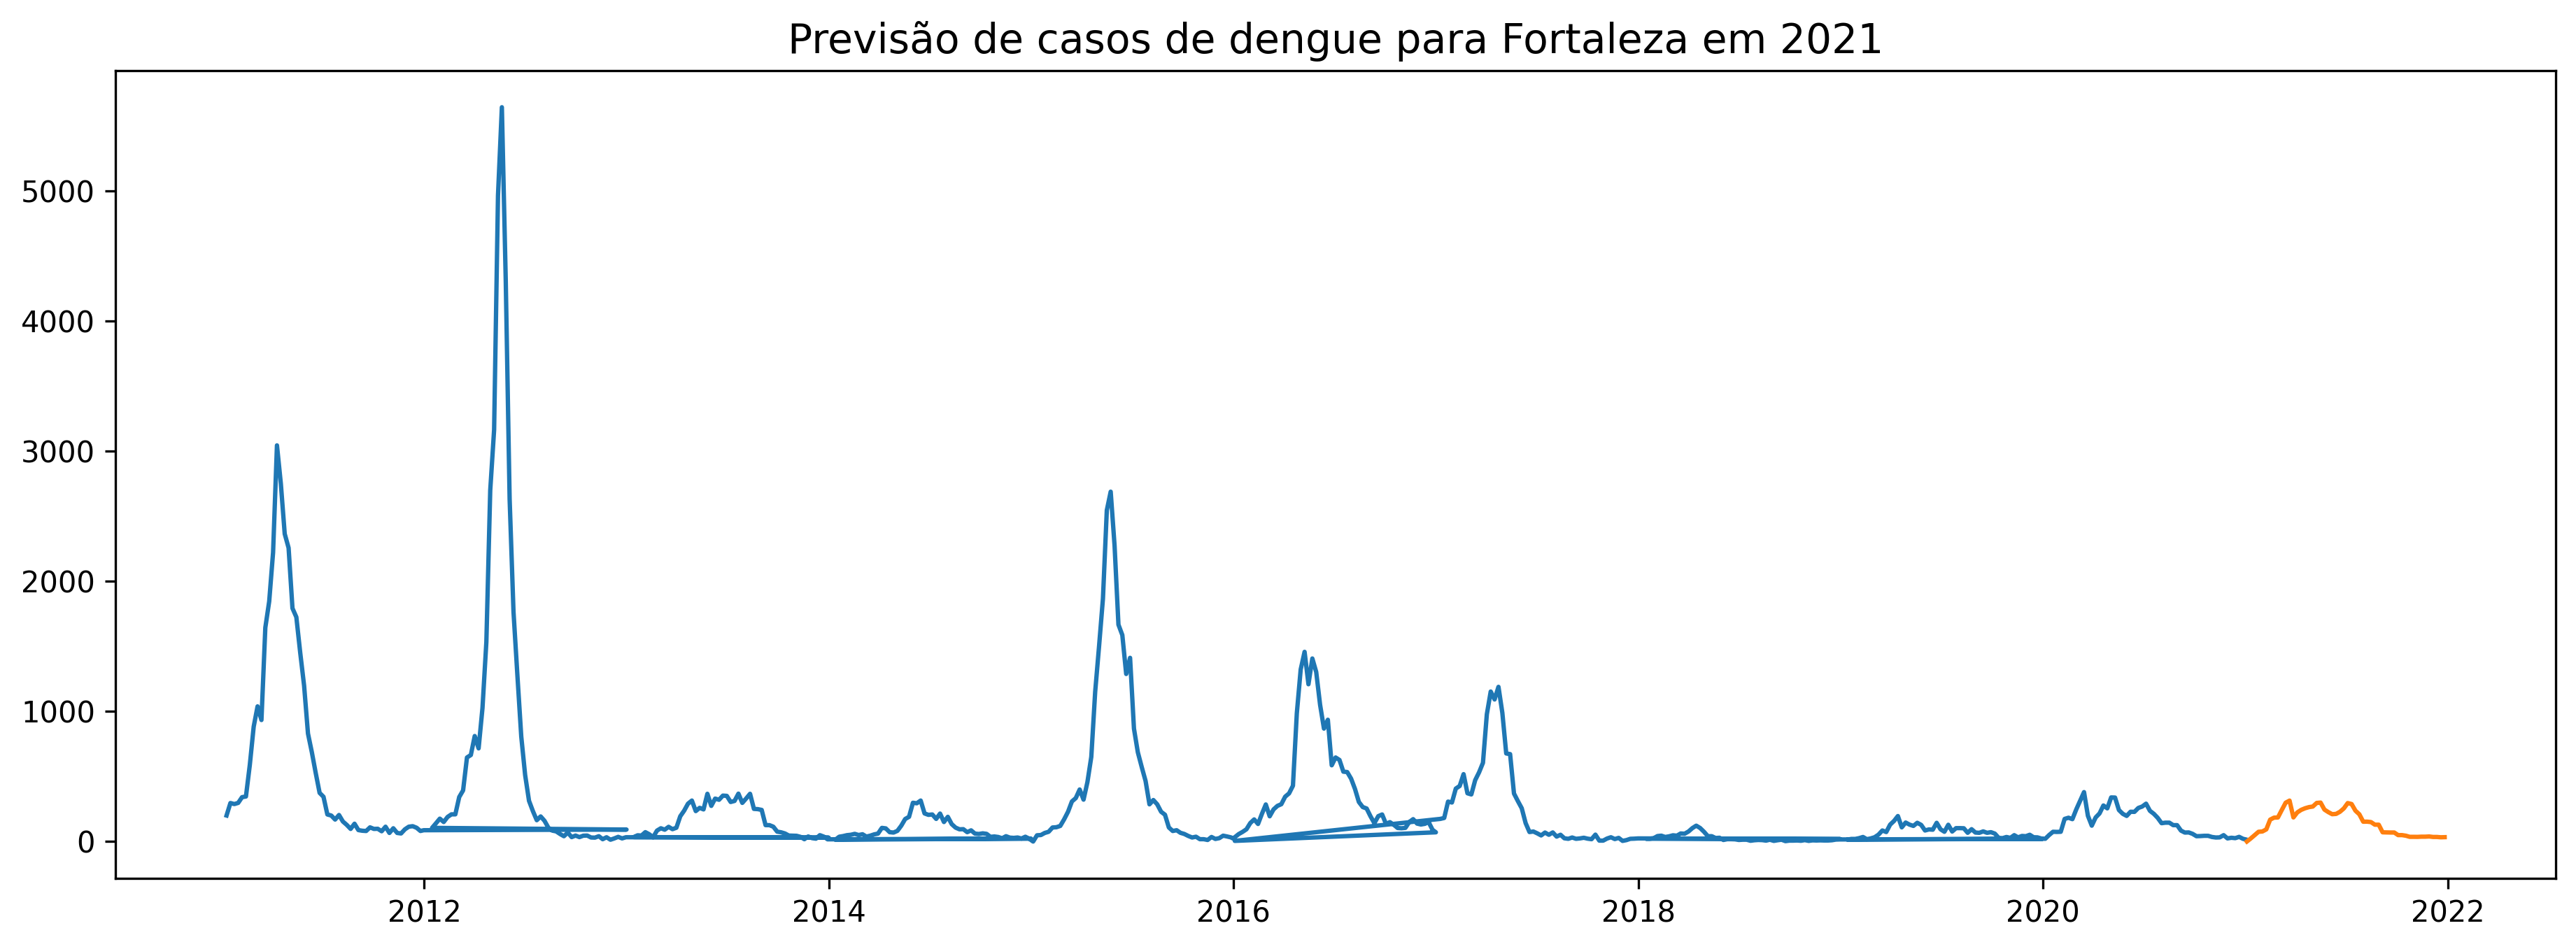

In [38]:
# previsão para 2021
y_pred = modelo.predict(df2021[['SEMANA_DO_ANO', 'ANO', 'MES']])
df2021['CASOS'] = y_pred

# casos negativos para zero
df2021.loc[df2021['CASOS'] < 0, 'CASOS'] = 0

# no eixo x usamos o index do df2021 e no eixo y usamos a previsão
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(df['CASOS'], label='real')
plt.plot(df2021['CASOS'], label='previsto')
plt.title('Previsão de casos de dengue para Fortaleza em 2021', fontsize=14)
plt.show()

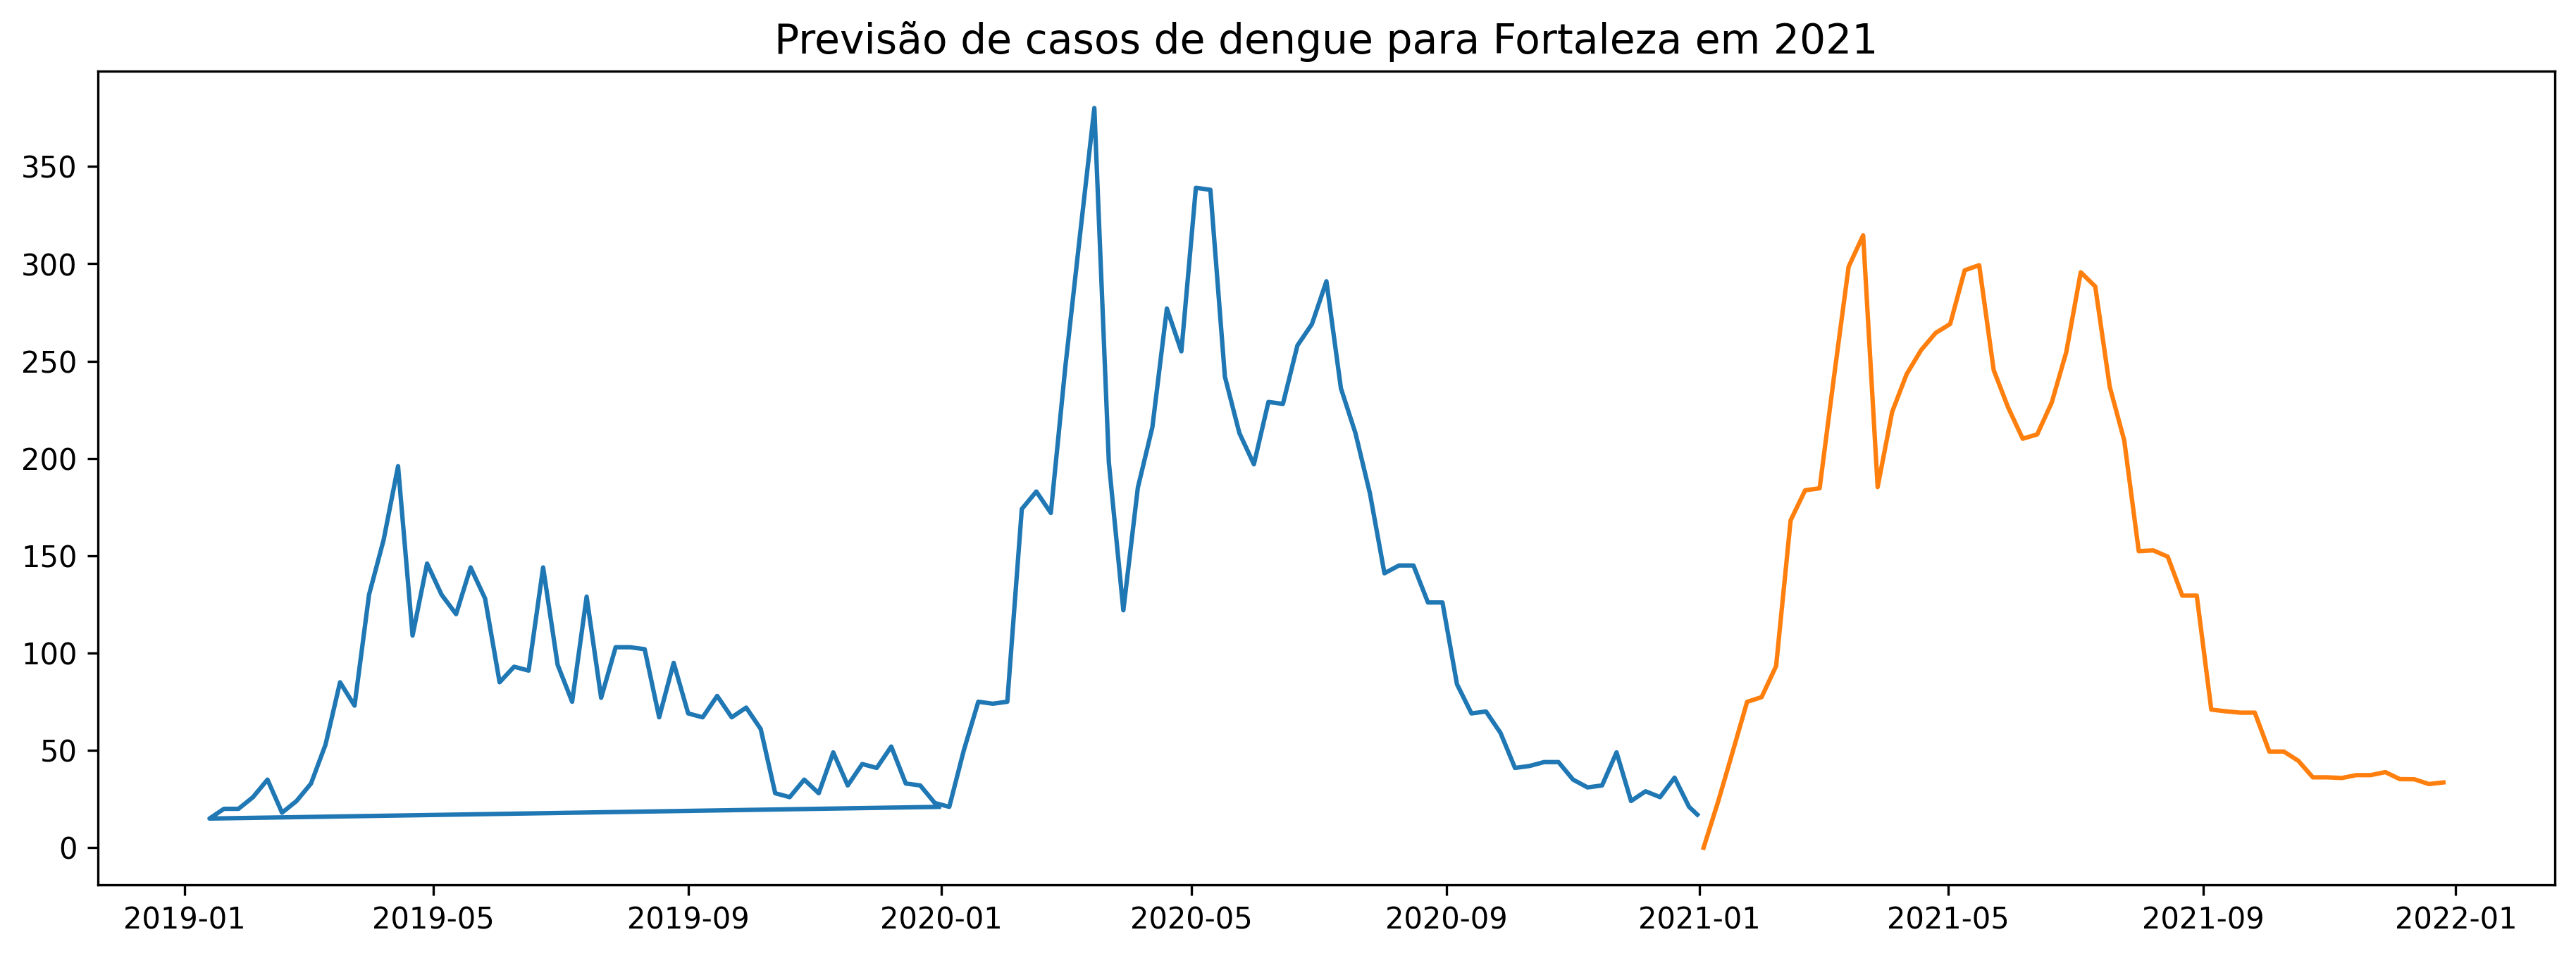

In [39]:
# plote o mesmo grafico acima porém de 2019 pra frente
subset=df.loc[(df.index.year>=2019)]

plt.figure(figsize=(15,5),dpi=300)
plt.plot(subset['CASOS'],label='real')
plt.plot(df2021['CASOS'],label='previsto')
plt.title('Previsão de casos de dengue para Fortaleza em 2021',fontsize=14)
plt.show()

## Preparando previsão usando dados das ultimas semanas

In [40]:
quantidade_semanas = 104
df_ultimas_semanas = df.tail(quantidade_semanas)

X_train = df_ultimas_semanas.drop('CASOS', axis=1)
y_train = df_ultimas_semanas['CASOS']

modelo_semanas = XGBRegressor(n_estimators=1000, learning_rate=0.01)
modelo.fit(X_train, y_train)

print('Treino:', mean_squared_error(y_train, modelo.predict(X_train)))


Treino: 15.242618883140354


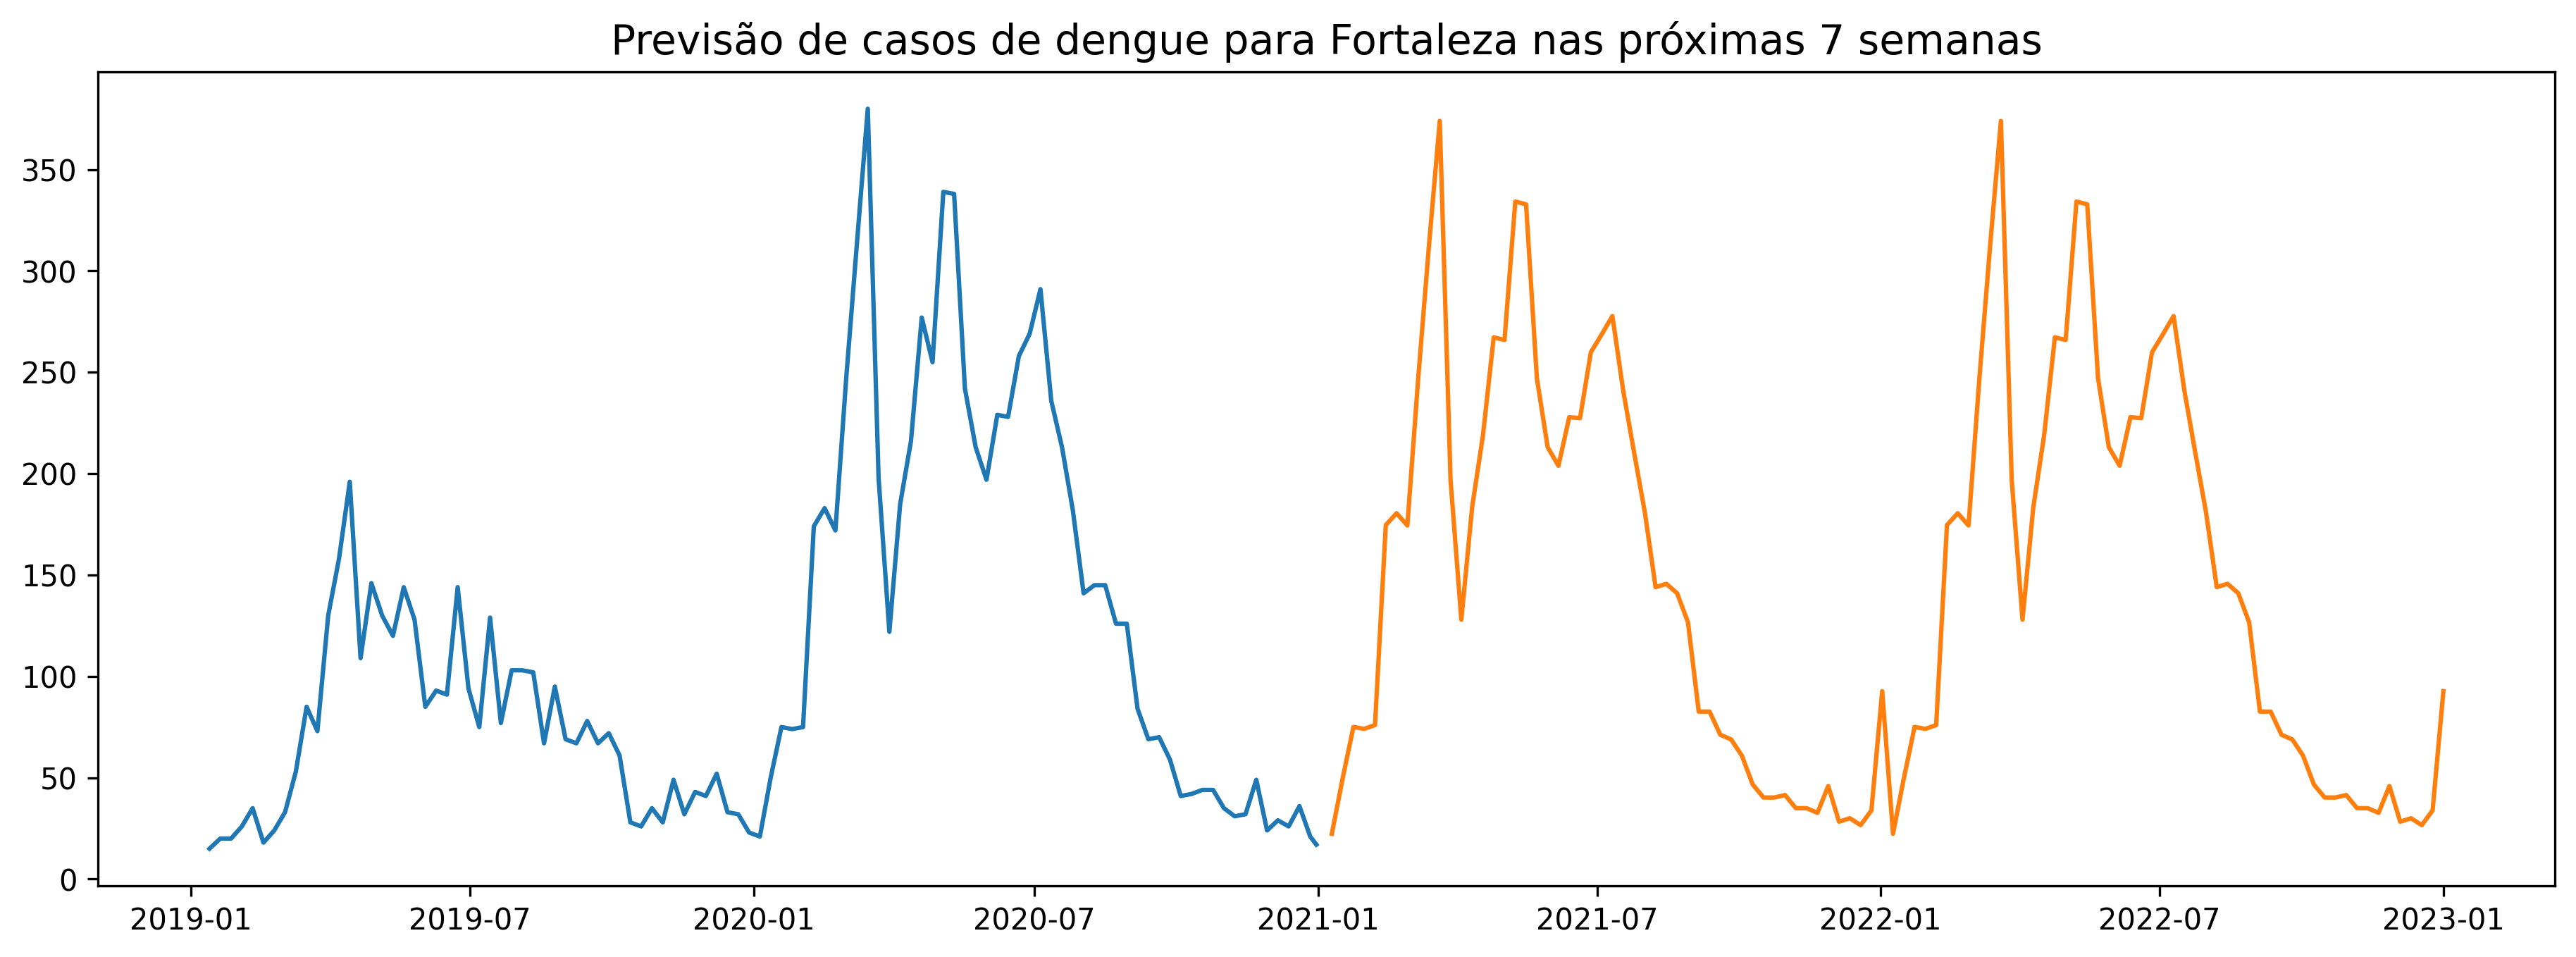

In [41]:
# agora usando esse modelo para prever as próximas 7 semanas
ultimaData = df_ultimas_semanas.index[-1]
proximaSemana = ultimaData + pd.Timedelta(weeks=1)
datas = pd.date_range(start=proximaSemana, periods=quantidade_semanas, freq='W')

df_proximas_semanas = pd.DataFrame(datas, columns=['DATA'])
df_proximas_semanas['SEMANA_DO_ANO'] = df_proximas_semanas['DATA'].dt.isocalendar().week
df_proximas_semanas['ANO'] = df_proximas_semanas['DATA'].dt.year
df_proximas_semanas['MES'] = df_proximas_semanas['DATA'].dt.month
df_proximas_semanas.set_index('DATA', inplace=True)

df_proximas_semanas.head()

y_pred = modelo.predict(df_proximas_semanas[['SEMANA_DO_ANO', 'ANO', 'MES']])
df_proximas_semanas['CASOS'] = y_pred

subset = df.tail(quantidade_semanas)
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(subset['CASOS'], label='real')
plt.plot(df_proximas_semanas['CASOS'], label='previsto')
plt.title('Previsão de casos de dengue para Fortaleza nas próximas 7 semanas', fontsize=14)
plt.show()


### f. Para 2011, as séries temporais de casos de dengue entre bairros são semelhantes? Calcule a correlação entre os pares de bairros e verifique o valor médio. 

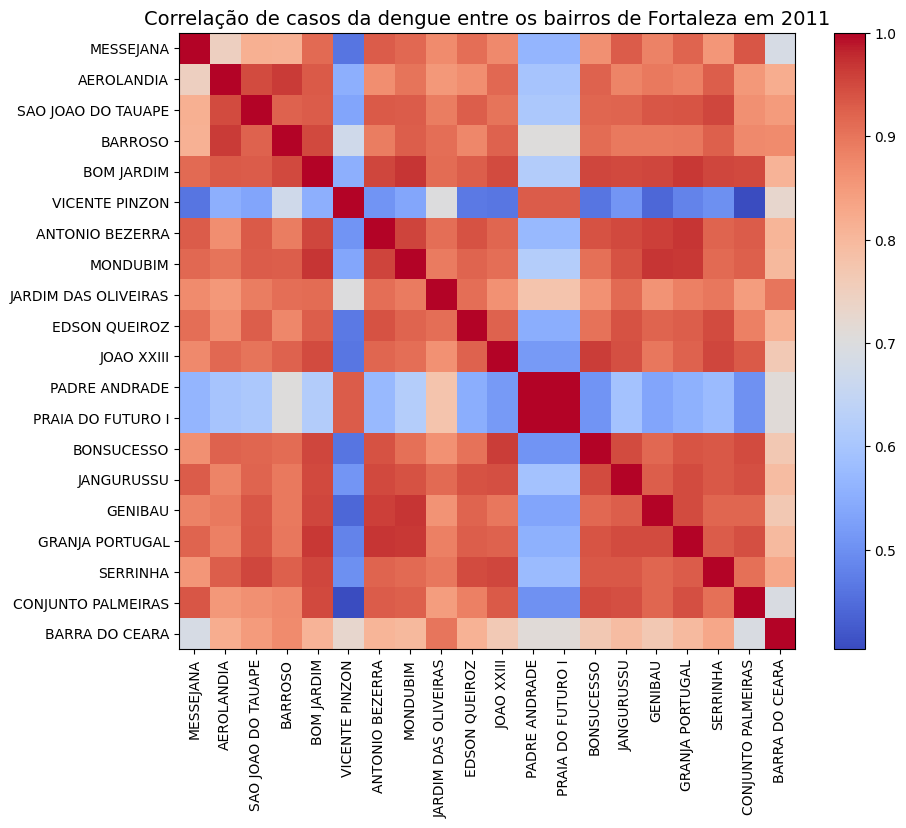

In [83]:
df2011 = df_original.loc[df_original['ANO'] == 2011]

topBairros = df2011.drop(['ANO', 'SEMANA_DO_ANO', 'DATA'], axis=1).sum().sort_values(ascending=False).head(20).index

topBairros
coorelacoes = df2011[topBairros].corr()

# plote um heatmap com as correlações
plt.figure(figsize=(10, 8))
plt.title('Correlação de casos da dengue entre os bairros de Fortaleza em 2011', fontsize=14)
plt.imshow(coorelacoes, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(coorelacoes)), coorelacoes.columns, rotation=90)
plt.yticks(range(len(coorelacoes)), coorelacoes.columns)
plt.show()


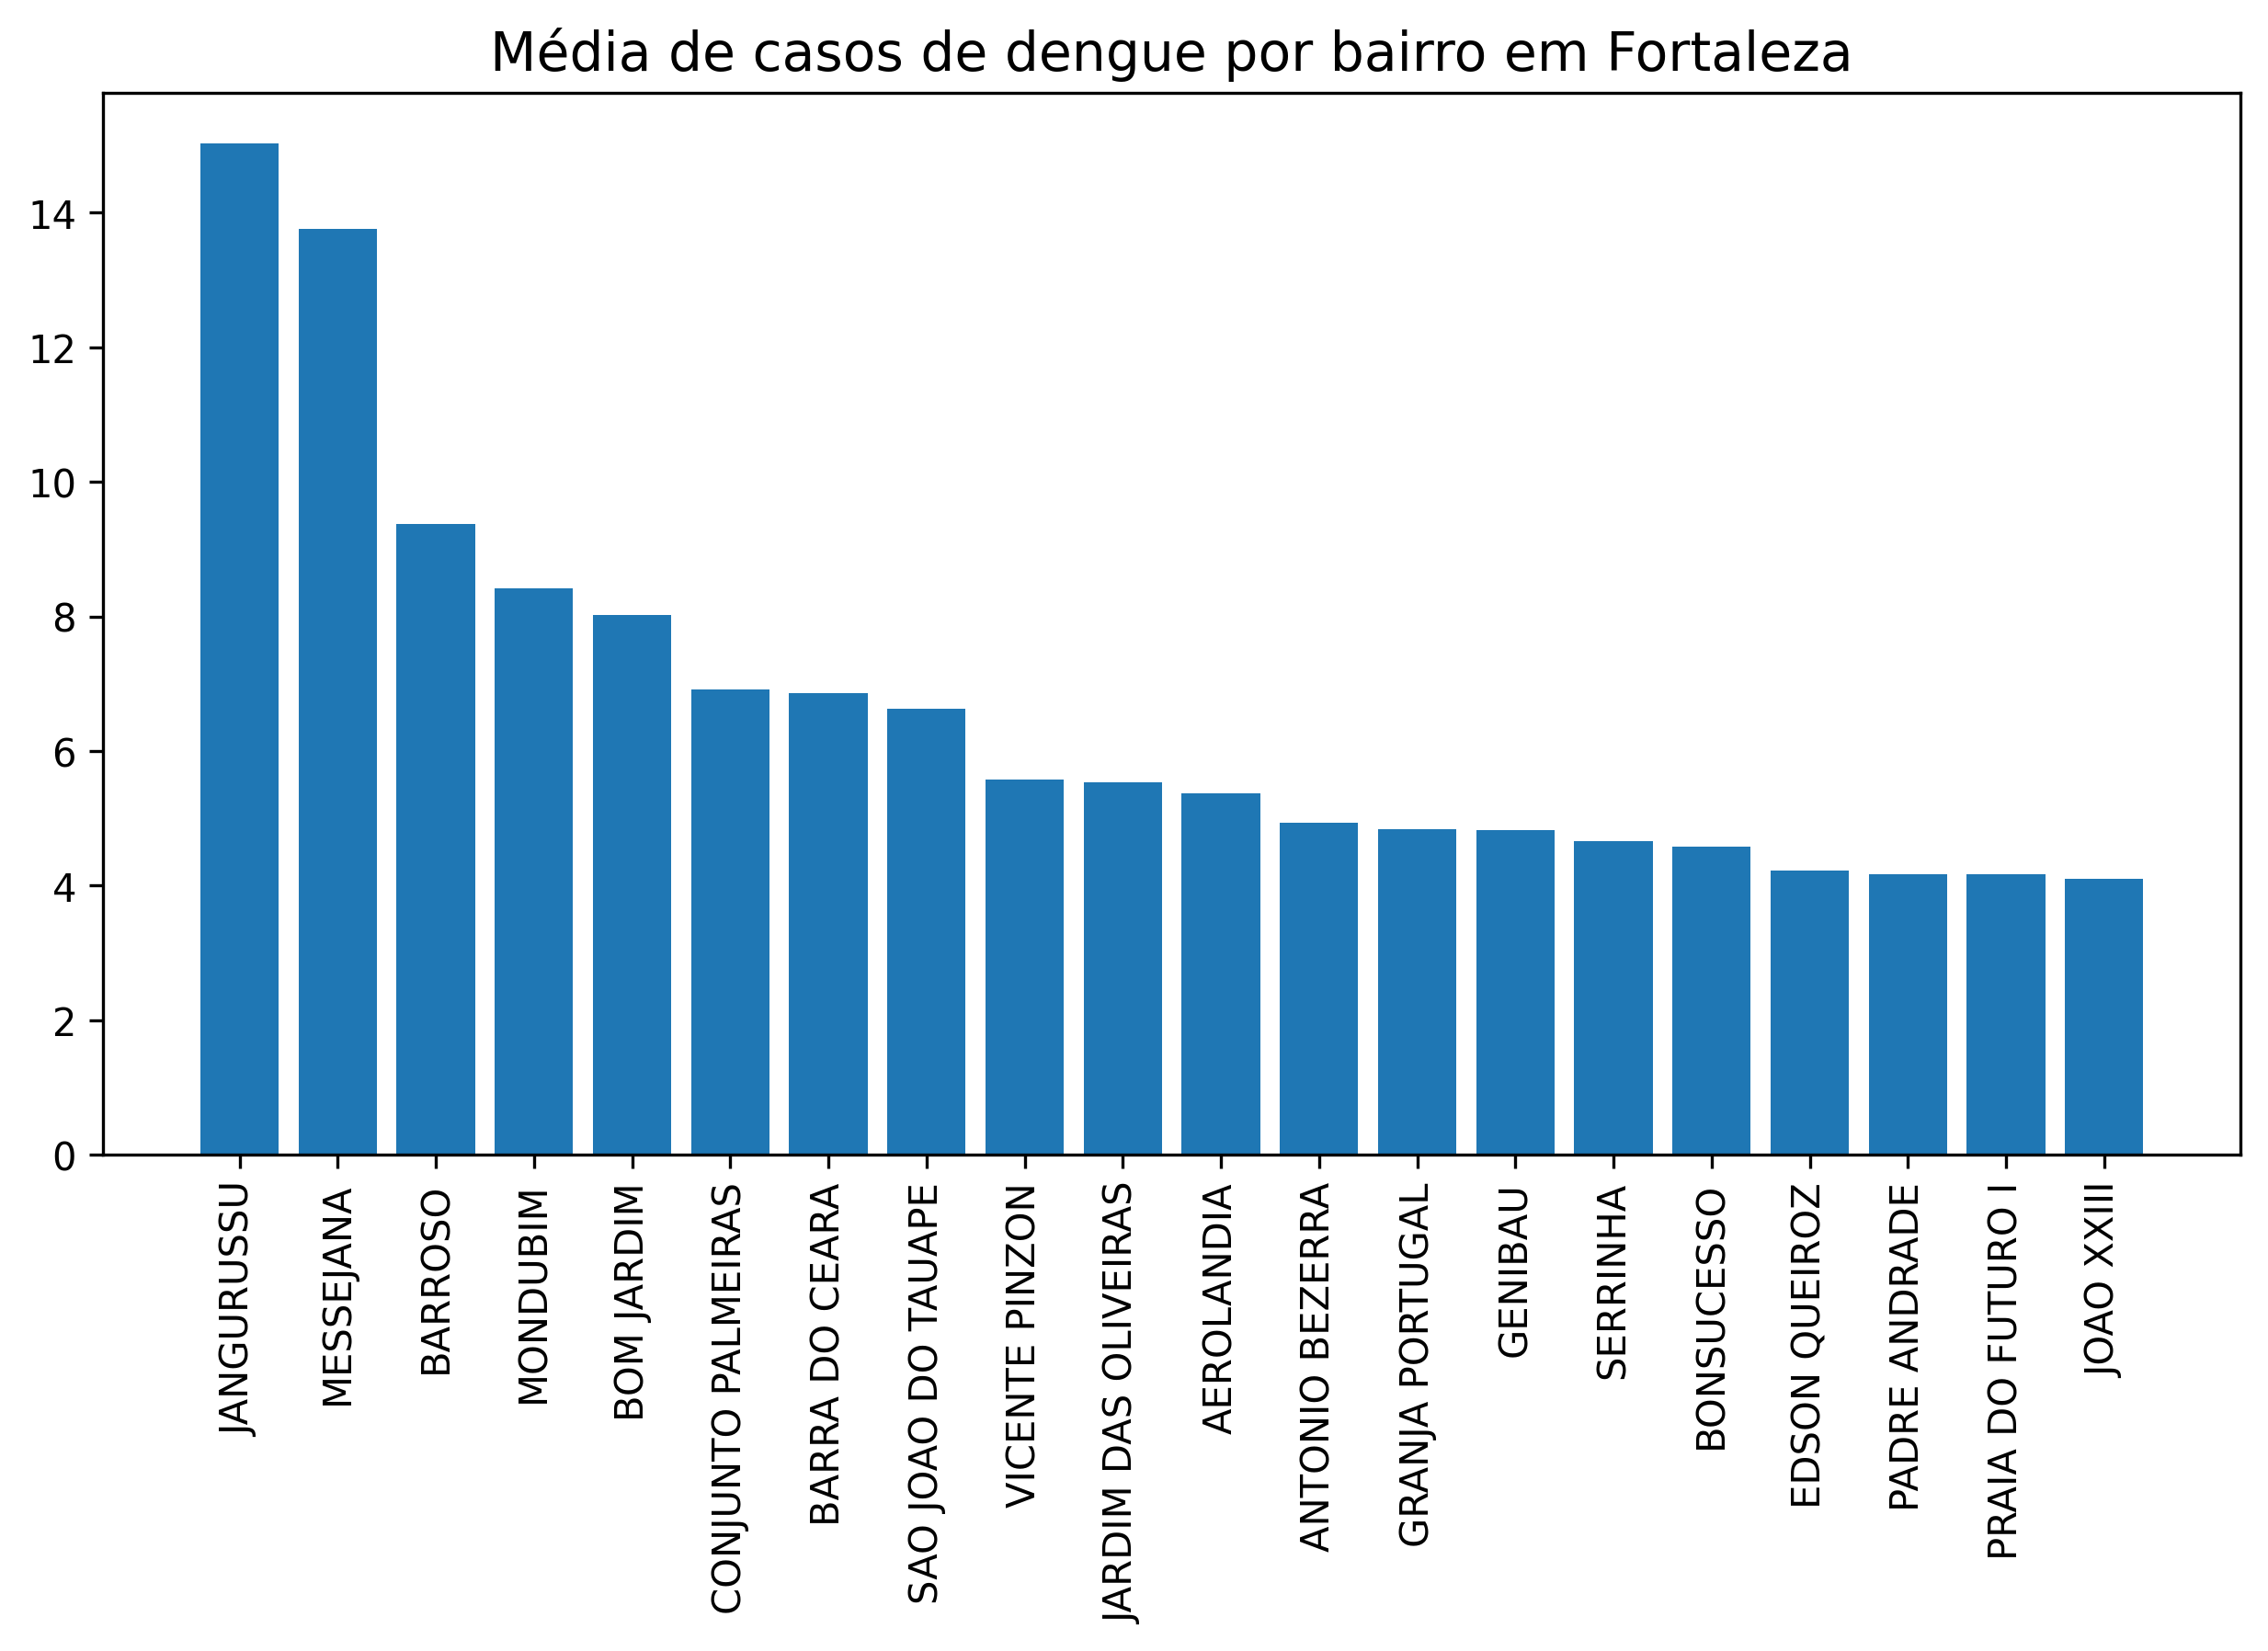

In [84]:
# verifique o valor médio de casos de dengue por bairro
mediaCasos = df_original[topBairros].mean().sort_values(ascending=False)

plt.bar(mediaCasos.index, mediaCasos)
plt.xticks(rotation=90)
plt.title('Média de casos de dengue por bairro em Fortaleza', fontsize=14)
plt.show()
